In [2]:
import pandas as pd
import numpy as np

### Chapter3 : 시리즈로 1차원 배열 다루기

In [3]:
# 데이터 입력
temp = pd.Series([-0.8, -0.1, 7.7, 13.8, 18.0, 22.4,
                  25.9, 25.3, 21.0, 14.0, 9.6, -1.4])
temp  # temp의 내용 확인

# 월 이름을 레이블 인덱스로 지정하기
temp.index  # 인덱스 내용 확인
temp.index = ['1월', '2월', '3월', '4월',  # 월 이름을 인덱스로 지정
              '5월', '6월', '7월', '8월',
              '9월', '10월', '11월', '12월']
temp  # temp의 내용 확인

1월     -0.8
2월     -0.1
3월      7.7
4월     13.8
5월     18.0
6월     22.4
7월     25.9
8월     25.3
9월     21.0
10월    14.0
11월     9.6
12월    -1.4
dtype: float64

In [9]:
# 인덱싱과 슬라이싱
temp.iloc[2]  # 인덱스 2의 값

7.7

In [10]:
temp.loc['3월']  # 인덱스 '3월'의 값

7.7

In [11]:
temp.iloc[[3, 5, 7]]  # 인덱스 3, 5, 7의 값

4월    13.8
6월    22.4
8월    25.3
dtype: float64

In [12]:
temp.loc[['4월', '6월', '8월']]  # 인덱스 '4월', '6월', '8월'의 값

4월    13.8
6월    22.4
8월    25.3
dtype: float64

In [13]:
temp.iloc[5:8]  # 인덱스 5~7의 값

6월    22.4
7월    25.9
8월    25.3
dtype: float64

In [14]:
temp.loc['6월':'9월']  # 인덱스 '6월'~'9월'의 값

6월    22.4
7월    25.9
8월    25.3
9월    21.0
dtype: float64

In [15]:
temp.iloc[:4]  # 인덱스 0~3의 값

1월    -0.8
2월    -0.1
3월     7.7
4월    13.8
dtype: float64

In [16]:
# 조건문을 이용한 슬라이싱

# 월평균 기온이 15도 이상인 월들의 기온을 보이시오
temp.loc[temp >= 15]

5월    18.0
6월    22.4
7월    25.9
8월    25.3
9월    21.0
dtype: float64

In [17]:
# 월평균 기온이 15도 이상 25도 미만인 월들의 기온을 보이시오
temp.loc[(temp >= 15) & (temp < 25)]

5월    18.0
6월    22.4
9월    21.0
dtype: float64

In [18]:
# 월평균 기온이 5도 미만이거나 25도 이상인 월들의 기온을 보이시오
temp.loc[(temp < 5) | (temp >= 25)]

1월     -0.8
2월     -0.1
7월     25.9
8월     25.3
12월    -1.4
dtype: float64

In [19]:
# 3월보다 기온이 낮은 월들의 기온을 보이시오
march = temp.loc['3월']
temp.loc[temp < march]

1월    -0.8
2월    -0.1
12월   -1.4
dtype: float64

In [20]:
# where()를 이용한 조건 검색
temp.where(temp >= 15)
temp.where(temp >= 15).dropna()

5월    18.0
6월    22.4
7월    25.9
8월    25.3
9월    21.0
dtype: float64

In [21]:
# 시리즈 객체에서 값의 위치 찾기

# 월평균 기온이 15도 이상인 월들의 이름을 보이시오
temp.loc[temp >= 15]  # 조건에 맞는 값 추출
temp.loc[temp >= 15].index  # 조건에 맞는 값들의 인덱스 추출

Index(['5월', '6월', '7월', '8월', '9월'], dtype='object')

In [22]:
# 시리즈 객체에 대한 산술 연산
temp + 1
2 * temp + 0.1
temp + temp
temp.loc[temp >= 15] + 1  # 기온이 15도가 넘는 월들에 대해서만 1 증가

5월    19.0
6월    23.4
7월    26.9
8월    26.3
9월    22.0
dtype: float64

In [23]:
# 통계 관련 메서드
temp.sum()  # 값들의 합계
temp.mean()  # 값들의 평균
temp.median()  # 값들의 중앙값
temp.max()  # 값들의 최댓값
temp.min()  # 값들의 최솟값
temp.std()  # 값들의 표준편차
temp.var()  # 값들의 분산
temp.abs()  # 값들의 절댓값
temp.describe()  # 기초 통계 정보

count    12.000000
mean     12.950000
std      10.026012
min      -1.400000
25%       5.750000
50%      13.900000
75%      21.350000
max      25.900000
dtype: float64

In [27]:
salary = pd.Series([20, 15, 18, 30])  # 레이블 인덱스가 없는 시리즈 객체
score = pd.Series([75, 80, 90, 60],
                  index=['KOR', 'ENG', 'MATH', 'SOC'])
salary
score

# 값의 변경
score.iloc[0] = 85  # 인덱스 0의 값을 변경
score
score.loc['SOC'] = 65  # 인덱스 'SOC'의 값을 변경
score
score.loc[['ENG', 'MATH']] = [70, 80]  # 인덱스 'ENG', 'MATH'의 값을 변경
score

KOR     85
ENG     70
MATH    80
SOC     65
dtype: int64

In [28]:
# 값의 추가 (레이블 인덱스가 있는 경우)
score.loc['PHY'] = 50  # 없는 인덱스 추가
score
score.iloc[5] = 90  # 에러 발생

IndexError: iloc cannot enlarge its target object

In [29]:
# 값의 추가 (레이블 인덱스가 없는 경우)
next_idx = salary.size
salary.iloc[next_idx] = 33  # 에러 발생

IndexError: iloc cannot enlarge its target object

In [30]:
salary.loc[next_idx] = 33  # 정상 수행
salary

0    20
1    15
2    18
3    30
4    33
dtype: int64

In [31]:
# _append() 메서드를 이용한 값의 추가
new = pd.Series({'MUS': 95})
score._append(new)  # score에 변경 없음
score

KOR     85
ENG     70
MATH    80
SOC     65
PHY     50
dtype: int64

In [32]:
score = score._append(new)  # score가 변경됨
score

KOR     85
ENG     70
MATH    80
SOC     65
PHY     50
MUS     95
dtype: int64

In [33]:
salary._append(pd.Series([66]), ignore_index=True)
salary = salary._append(pd.Series([66]), ignore_index=True)
salary

0    20
1    15
2    18
3    30
4    33
5    66
dtype: int64

In [34]:
score.drop('PHY')  # 레이블 인덱스가 있는 경우
score
score = score.drop('PHY')
score

KOR     85
ENG     70
MATH    80
SOC     65
MUS     95
dtype: int64

In [35]:
salary = salary.drop(1)  # 레이블 인덱스가 숫자인 경우
salary

0    20
2    18
3    30
4    33
5    66
dtype: int64

In [37]:
score_1 = pd.Series([80, 75, 90],
                    index=['KOR', 'ENG', 'MATH'])

score_2 = score_1  # score_1과 score_2는 동일한 객체
score_2.loc['KOR'] = 95

In [38]:
score_2

KOR     95
ENG     75
MATH    90
dtype: int64

In [39]:
score_1

KOR     95
ENG     75
MATH    90
dtype: int64

### Chapter4 : 데이터프레임으로 2차원 배열 다루기

In [54]:
df = pd.read_csv("./iris.csv")

In [55]:
df.head()

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [56]:
# 데이터프레임 객체의 정보 확인
df.info()  # 배열의 정보
df.shape  # 배열의 형태
df.shape[0]  # 행의 개수
df.shape[1]  # 컬럼의 개수

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Sepal_Length  150 non-null    float64
 1   Sepal_Width   150 non-null    float64
 2   Petal_Length  150 non-null    float64
 3   Petal_Width   150 non-null    float64
 4   Species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


5

In [57]:
# 데이터프레임 객체의 정보 확인
df.info()  # 배열의 정보
df.shape  # 배열의 형태
df.shape[0]  # 행의 개수
df.shape[1]  # 컬럼의 개수

df.dtypes  # 각 컬럼의 자료형
df['Species'] = df['Species'].astype('category')
df.dtypes

df.columns  # 컬럼들의 이름 보기

df.head()  # 데이터 앞부분 일부 보기
df.tail()  # 데이터 뒷부분 일부 보기

df['Species'].unique()  # 품종 정보 확인

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Sepal_Length  150 non-null    float64
 1   Sepal_Width   150 non-null    float64
 2   Petal_Length  150 non-null    float64
 3   Petal_Width   150 non-null    float64
 4   Species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


['setosa', 'versicolor', 'virginica']
Categories (3, object): ['setosa', 'versicolor', 'virginica']

In [58]:
# 인덱싱과 슬라이싱
df.iloc[2, 3]  # 2행 3열의 값
df.loc[3, 'Petal_Width']  # 'Petal_Width' 컬럼의 3행 값
df.loc[[0, 2, 4], ['Petal_Length', 'Petal_Width']]

df.loc[5:8, 'Petal_Length']  # 'Petal_Length' 컬럼의 5~8행 값
df.iloc[:5, :4]  # 0~4행, 0~3열의 값

df.loc[:, 'Petal_Length']  # 'Petal_Length' 컬럼의 모든 행의 값
df['Petal_Length']  # 'Petal_Length' 컬럼의 모든 값
df.Petal_Length  # 'Petal_Length' 컬럼의 모든 값

df.iloc[:5, :]  # 0~4행의 모든 컬럼의 값
df.iloc[:5]  # 0~4행의 모든 컬럼의 값

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [59]:
# 조건문을 이용한 슬라이싱

# 꽃잎의 길이가 6.5 이상인 행들의 모든 컬럼을 보이시오
df.loc[df.Petal_Length >= 6.5, :]
df.loc[df.Petal_Length >= 6.5]  # 모든 컬럼의 경우 컬럼 인덱스 생략

# 꽃잎의 길이가 6.5 이상인 행들의 인덱스 번호를 보이시오
df.loc[df.Petal_Length >= 6.5].index

# 꽃잎의 길이가 3.5~3.8 사이인 행들의 모든 컬럼을 보이시오
df.loc[(df.Petal_Length >= 3.5) &
       (df.Petal_Length <= 3.8)]

# 꽃잎의 길이가 1.3 미만이거나 6.5를 초과하는 행들의 꽃잎의 길이와 폭을 보이시오
df.loc[(df.Petal_Length < 1.3) |
       (df.Petal_Length > 6.5), ['Petal_Length', 'Petal_Width']]

# where()를 이용한 조건 검색
df.where(df.Petal_Length >= 6.5).dropna()

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width,Species
105,7.6,3.0,6.6,2.1,virginica
117,7.7,3.8,6.7,2.2,virginica
118,7.7,2.6,6.9,2.3,virginica
122,7.7,2.8,6.7,2.0,virginica


In [60]:
# 데이터프레임 객체에 대한 산술 연산
df.loc[:, df.columns != 'Species'] # 'Species' 컬럼 제외
df.loc[:, ~df.columns.isin(['Species'])] # 'Species' 컬럼 제외

df.loc[:, df.columns != 'Species'] + 10 # 모든 값에 10을 더함

df['Sepal_Length'] + df['Petal_Length'] # 두 컬럼의 같은 행 값들끼리 연산
# 꽃잎의 길이가 5 이상인 경우에는 꽃잎의 길이에 –1을 곱하시오
# (5 미만인 경우에는 원래 값 유지)
tmp = df['Petal_Length'].apply(lambda x: -1 if x >= 5 else 1)
tmp
df['Petal_Length'] * tmp

0      1.4
1      1.4
2      1.3
3      1.5
4      1.4
      ... 
145   -5.2
146   -5.0
147   -5.2
148   -5.4
149   -5.1
Name: Petal_Length, Length: 150, dtype: float64

In [61]:
# 데이터프레임의 통계 관련 메서드
df2 = df.loc[:, df.columns != 'Species']  # 숫자형 컬럼만 추출
df2.sum()  # 값들의 합계
df2.mean()  # 값들의 평균
df2.median()  # 값들의 중앙값
df2.max()  # 값들의 최댓값
df2.min()  # 값들의 최솟값
df2.std()  # 값들의 표준편차
df2.var()  # 값들의 분산
df2.abs()  # 값들의 절댓값
df2.describe()  # 기초 통계 정보

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [62]:
# 데이터프레임 객체에 있는 값의 수정
df3 = df.copy()  # df를 df3로 복사
df3.iloc[1, 2] = 5.5  # 1행 2열의 값 수정

df3.loc[1, 'Petal_Length'] = 1.1

df3.Petal_Length.to_list()  # 시리즈를 리스트 형태로 출력
df3.loc[df.Petal_Length > 6.5, 'Petal_Length'] *= 100
df3.Petal_Length.to_list()  # 시리즈를 리스트 형태로 출력

[1.4,
 1.1,
 1.3,
 1.5,
 1.4,
 1.7,
 1.4,
 1.5,
 1.4,
 1.5,
 1.5,
 1.6,
 1.4,
 1.1,
 1.2,
 1.5,
 1.3,
 1.4,
 1.7,
 1.5,
 1.7,
 1.5,
 1.0,
 1.7,
 1.9,
 1.6,
 1.6,
 1.5,
 1.4,
 1.6,
 1.6,
 1.5,
 1.5,
 1.4,
 1.5,
 1.2,
 1.3,
 1.4,
 1.3,
 1.5,
 1.3,
 1.3,
 1.3,
 1.6,
 1.9,
 1.4,
 1.6,
 1.4,
 1.5,
 1.4,
 4.7,
 4.5,
 4.9,
 4.0,
 4.6,
 4.5,
 4.7,
 3.3,
 4.6,
 3.9,
 3.5,
 4.2,
 4.0,
 4.7,
 3.6,
 4.4,
 4.5,
 4.1,
 4.5,
 3.9,
 4.8,
 4.0,
 4.9,
 4.7,
 4.3,
 4.4,
 4.8,
 5.0,
 4.5,
 3.5,
 3.8,
 3.7,
 3.9,
 5.1,
 4.5,
 4.5,
 4.7,
 4.4,
 4.1,
 4.0,
 4.4,
 4.6,
 4.0,
 3.3,
 4.2,
 4.2,
 4.2,
 4.3,
 3.0,
 4.1,
 6.0,
 5.1,
 5.9,
 5.6,
 5.8,
 660.0,
 4.5,
 6.3,
 5.8,
 6.1,
 5.1,
 5.3,
 5.5,
 5.0,
 5.1,
 5.3,
 5.5,
 670.0,
 690.0,
 5.0,
 5.7,
 4.9,
 670.0,
 4.9,
 5.7,
 6.0,
 4.8,
 4.9,
 5.6,
 5.8,
 6.1,
 6.4,
 5.6,
 5.1,
 5.6,
 6.1,
 5.6,
 5.5,
 4.8,
 5.4,
 5.6,
 5.1,
 5.1,
 5.9,
 5.7,
 5.2,
 5.0,
 5.2,
 5.4,
 5.1]

In [63]:
# 데이터프레임 객체에 있는 값의 수정
df3 = df.copy()  # df를 df3로 복사
df3.iloc[1, 2] = 5.5  # 1행 2열의 값 수정

df3.loc[1, 'Petal_Length'] = 1.1
df3.loc[df.Petal_Length > 6.5, 'Petal_Length'] *= 100

# 코드 4-7에 이어서 실행 #######################################################

# 데이터프레임 객체에 대한 행과 컬럼의 추가

# 뒷부분에 새로운 행 추가
new_idx = df3.shape[0]  # 추가할 행 번호 결정
df3.loc[new_idx] = [1.1, 4.5, 3.4, 2.2, 'setosa']
df3.tail()

# 중간에 새로운 행 추가
new_row = pd.DataFrame([[1.1, 2.2, 3.3, 4.4, 'virginica']],
                       columns=df3.columns)
new_row
df3 = pd.concat([df3.iloc[:10], new_row, df3.iloc[10:]], ignore_index=True)
df3.iloc[8:13, :]  # 입력 결과 확인

# 여러 행 추가
ext = pd.DataFrame([[1.2, 3.5, 4.3, 3.1, 'setosa'],
                    [2.1, 3.2, 2.3, 5.2, 'versicolor']],
                   columns=df3.columns)
ext
df3 = df3._append(ext, ignore_index=True)
df3

# 뒤쪽에 컬럼 추가
new_col = df3.Petal_Length * 10
df3['new_col'] = new_col
df3

# 중간에 컬럼 추가
df4 = df.copy()
df4.insert(loc=2, column='new_col2', value=new_col)  # 컬럼 인덱스 2 위치에 추가
df4

,Sepal_Length,Sepal_Width,new_col2,Petal_Length,Petal_Width,Species
0,5.1,3.5,14.0,1.4,0.2,setosa
1,4.9,3.0,11.0,1.4,0.2,setosa
2,4.7,3.2,13.0,1.3,0.2,setosa
3,4.6,3.1,15.0,1.5,0.2,setosa
4,5.0,3.6,14.0,1.4,0.2,setosa
...,...,...,...,...,...,...
145,6.7,3.0,57.0,5.2,2.3,virginica
146,6.3,2.5,52.0,5.0,1.9,virginica
147,6.5,3.0,50.0,5.2,2.0,virginica
148,6.2,3.4,52.0,5.4,2.3,virginica


In [64]:
df5 = df.copy()

# 행의 삭제
df5 = df5.drop(index=[1, 3])
df5
df5 = df5.reset_index()
df5

# 컬럼의 삭제
df5 = df5.drop(columns='Petal_Length')
df5

,index,Sepal_Length,Sepal_Width,Petal_Width,Species
0,0,5.1,3.5,0.2,setosa
1,2,4.7,3.2,0.2,setosa
2,4,5.0,3.6,0.2,setosa
3,5,5.4,3.9,0.4,setosa
4,6,4.6,3.4,0.3,setosa
...,...,...,...,...,...
143,145,6.7,3.0,2.3,virginica
144,146,6.3,2.5,1.9,virginica
145,147,6.5,3.0,2.0,virginica
146,148,6.2,3.4,2.3,virginica


### Chapter 5 : 단일 변수 데이터 탐색(시각화)

In [65]:
# 도수분포표 작성
favorite = pd.Series(['WINTER', 'SUMMER', 'SPRING', 'SUMMER', 'SUMMER',
                      'FALL', 'FALL', 'SUMMER', 'SPRING', 'SPRING'])

favorite  # favorite의 내용 출력
favorite.value_counts()  # 도수분포 계산
favorite.value_counts()/favorite.size  # 비율 계산

fd = favorite.value_counts()  # 도수분포를 fd에 저장
type(fd)  # fd의 자료구조 확인
fd['SUMMER']  # SUMMER의 빈도 확인
fd.iloc[2]  # 인덱스 2의 빈도 확인

2

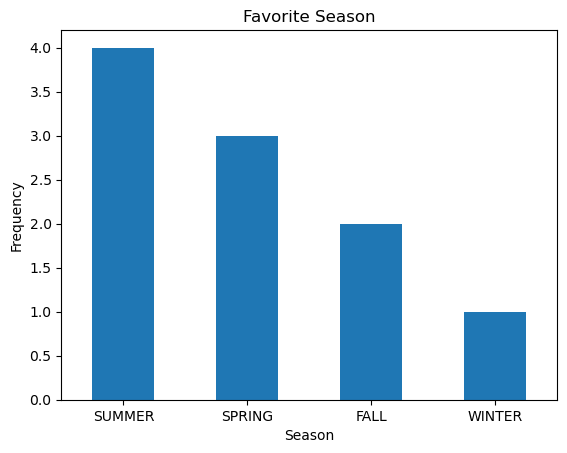

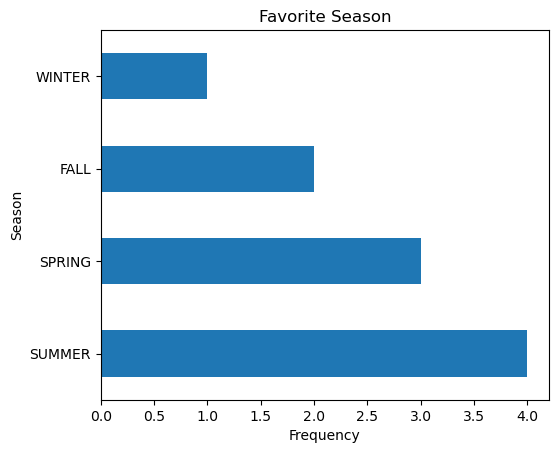

In [68]:
import matplotlib.pyplot as plt

# 막대 그래프의 세로 출력
fd.plot.bar(xlabel='Season',  # x축 레이블
            ylabel='Frequency',  # y축 레이블
            rot=0,  # x축 값의 회전 각도
            title='Favorite Season')  # 그래프 제목
plt.show()

# 막대그래프의 가로 출력
fd.plot.barh(xlabel='Frequency',  # x축 레이블
             ylabel='Season',  # y축 레이블
             rot=0,  # x축 값의 회전 각도
             title='Favorite Season')  # 그래프 제목
plt.subplots_adjust(left=0.2)  # 그래프 왼쪽 여백 조정
plt.show()

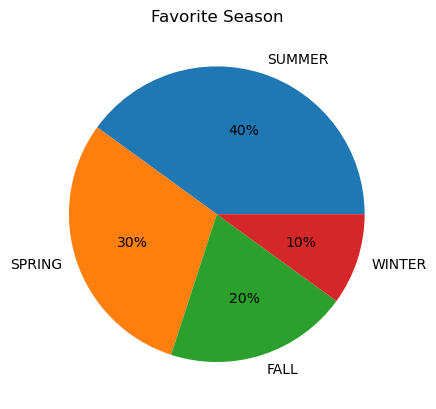

In [69]:
# 원그래프 작성
fd.plot.pie(ylabel='',  # y축 레이블
            autopct='%1.0f%%',  # 백분율 출력 지정
            title='Favorite Season')  # 그래프 제목
plt.show()

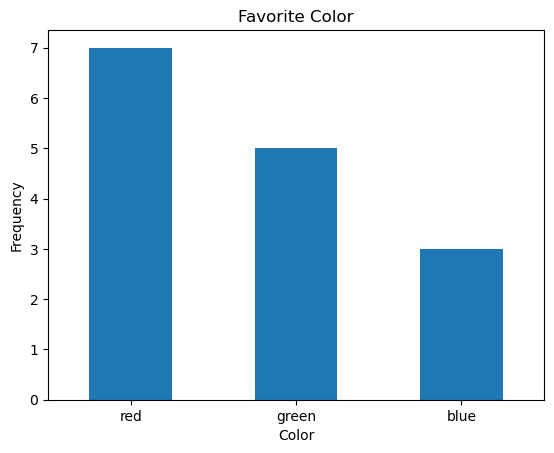

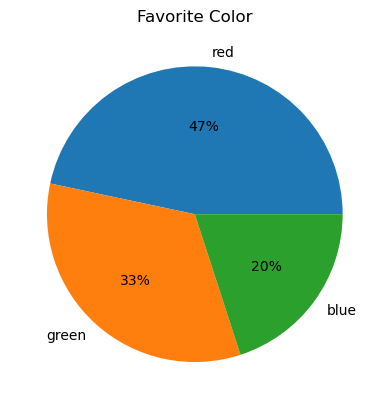

In [70]:
# 숫자로 표현된 범주형 데이터의 시각화
colors = pd.Series([2, 3, 2, 1, 1, 2, 2, 1, 3, 2, 1, 3, 2, 1, 2])

fd = colors.value_counts()  # 도수분포를 fd에 저장
fd
fd.index  # fd의 인덱스 출력
fd.index = ['red', 'green', 'blue']  # 숫자 인덱스를 문자 인덱스로 변경
fd

# 막대그래프 출력
fd.plot.bar(xlabel='Color', ylabel='Frequency', rot=0, title='Favorite Color')
plt.show()

# 원그래프 출력
fd.plot.pie(ylabel='', autopct='%1.0f%%', title='Favorite Color')
plt.show()


In [72]:
from scipy import stats

In [73]:
# 평균 계산 방식
ds = [60, 62, 64, 65, 68, 69]
weight = pd.Series(ds)
ds.append(120)  # ds에 120 추가
weight_heavy = pd.Series(ds)
weight
weight_heavy

weight.mean()  # 평균
weight_heavy.mean()  # 평균

weight.median()  # 중앙값
weight_heavy.median()  # 중앙값

stats.trim_mean(weight, 0.2)  # 절사평균(상하위 20% 제외)
stats.trim_mean(weight_heavy, 0.2)  # 절사평균(상하위 20% 제외)

65.6

In [74]:
# 사분위수 계산
mydata = [60, 62, 64, 65, 68, 69, 120]
mydata = pd.Series(mydata)
mydata.quantile(0.25)  # Q1
mydata.quantile(0.5)  # Q2
mydata.quantile(0.75)  # Q3
mydata.quantile([0.25, 0.5, 0.75])

mydata.quantile(np.arange(0, 1, 0.1))  # 10% 단위로 구간을 나누어 계산
mydata.describe()  # 사분위수를 포함한 요약 정보


count      7.000000
mean      72.571429
std       21.149130
min       60.000000
25%       63.000000
50%       65.000000
75%       68.500000
max      120.000000
dtype: float64

In [75]:
# 산포 계산
mydata = pd.Series([60, 62, 64, 65, 68, 69, 72])

mydata.var()  # 분산
mydata.std()  # 표준편차

4.191828786034631

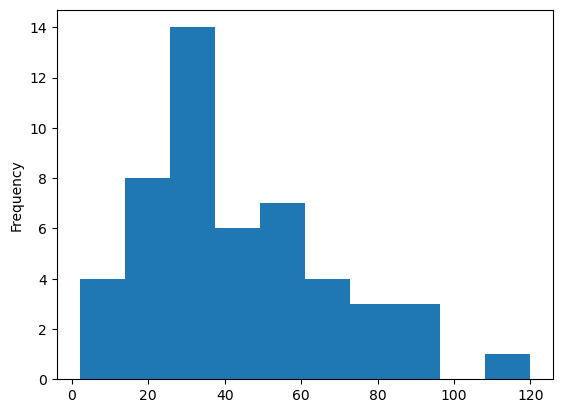

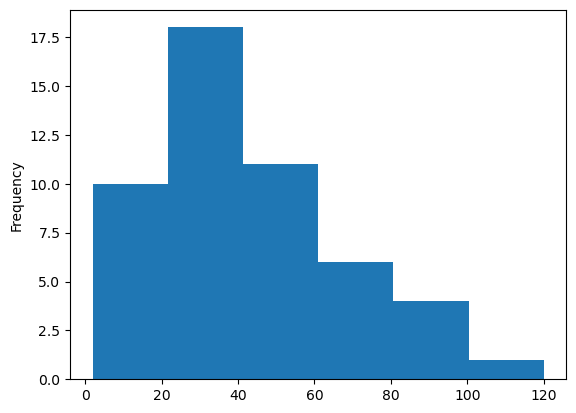

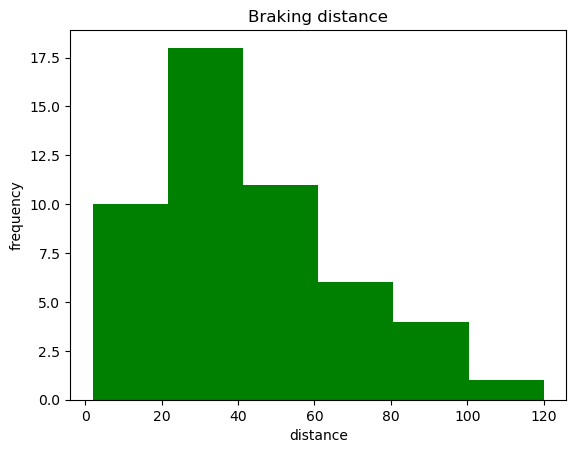

In [76]:
# 데이터 준비
df = pd.read_csv('./cars.csv')
dist = df['dist']  # 제동거리
dist

# 구간 개수를 지정하여 히스토그램 그리기
dist.plot.hist()  # 기본 그래프
plt.show()

dist.plot.hist(bins=6)  # 막대 개수 지정
plt.show()

# 구간별 빈도수 계산
dist.value_counts(bins=6, sort=False)

dist.plot.hist(bins=6,  # 막대 개수 지정
               title='Braking distance',  # 그래프 제목
               xlabel='distance',  # x축 레이블
               ylabel='frequency',  # y축 레이블
               color='g')  # 막대 색
plt.show()

In [79]:
df.head()

,speed,dist
0,4,2
1,4,10
2,7,4
3,7,22
4,8,16


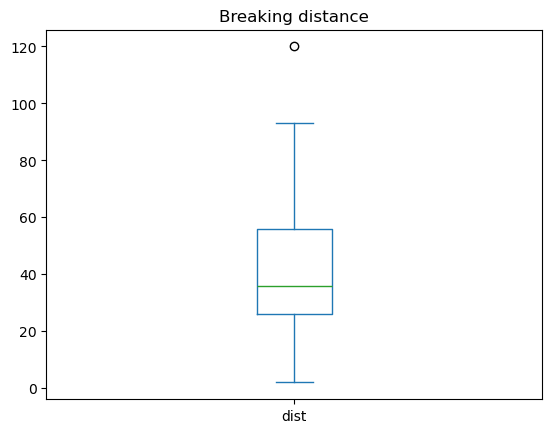

In [77]:
# 상자그림 그리기
dist.plot.box(title='Breaking distance')
plt.show()


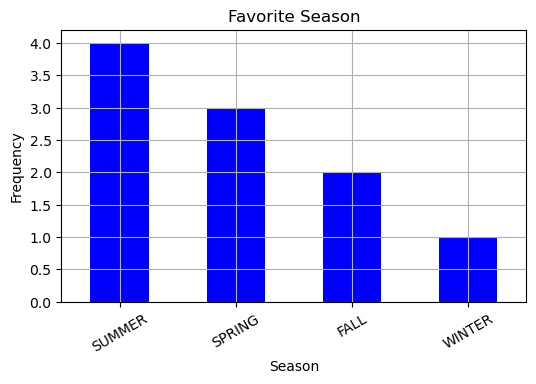

In [80]:
favorite = pd.Series(['WINTER', 'SUMMER', 'SPRING', 'SUMMER', 'SUMMER',
                      'FALL', 'FALL', 'SUMMER', 'SPRING', 'SPRING'])

fd = favorite.value_counts()  # 도수분포를 fd에 저장

fd.plot.bar(xlabel='Season',  # x축 레이블
            ylabel='Frequency',  # y축 레이블
            rot=30,  # x축 값의 회전 각도
            title='Favorite Season',  # 그래프 제목
            color='b',  # 막대의 색
            grid=True,  # 격자 표시
            figsize=(6, 4)  # 그래프의 크기(inch)
            )

plt.subplots_adjust(bottom=0.2)  # 그래프 아래쪽 여백
plt.show()


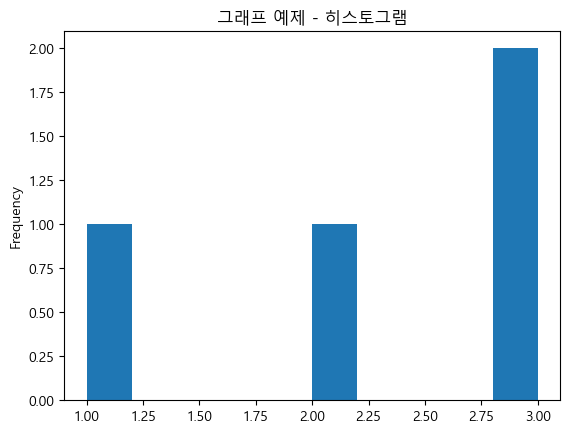

In [81]:
plt.rcParams['font.family'] = 'Malgun Gothic'  # 한글 폰트 설정
plt.rcParams['axes.unicode_minus'] = False  # 마이너스 부호 깨짐 방지

ser = pd.Series([1, 2, 3, 3])
ser.plot.hist(title='그래프 예제 - 히스토그램')
plt.show()